## Part I: Supervised Learning 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from warnings import filterwarnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
from scipy.stats import chi2, chi2_contingency
import scipy
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [2]:
import os
print(os.getcwd())

C:\Users\Win\Documents\Machine Learning\Exam1


# READ THE DATA

In [3]:
data=pd.read_csv("C:/Users/Win/Documents/Machine Learning/Exam1/bank.csv",delimiter=';')
pd.options.display.max_columns=100
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# MISSING VALUE CHECKING 

In [5]:
missing_value= data.isnull().sum().sort_values(ascending=False)
missing_value[missing_value>0]

Series([], dtype: int64)

In [6]:
# no missing value found

### 1. What does the primary analysis of several categorical features reveal?

Dividing the Data into categorical and numerical Features

In [7]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [8]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features
data[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


Value Counts of the  job column is
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 



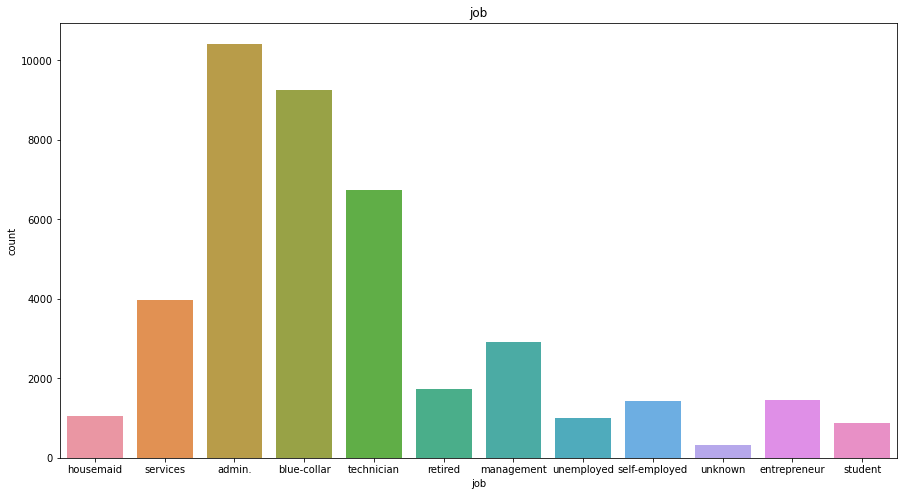

Value Counts of the  marital column is
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 



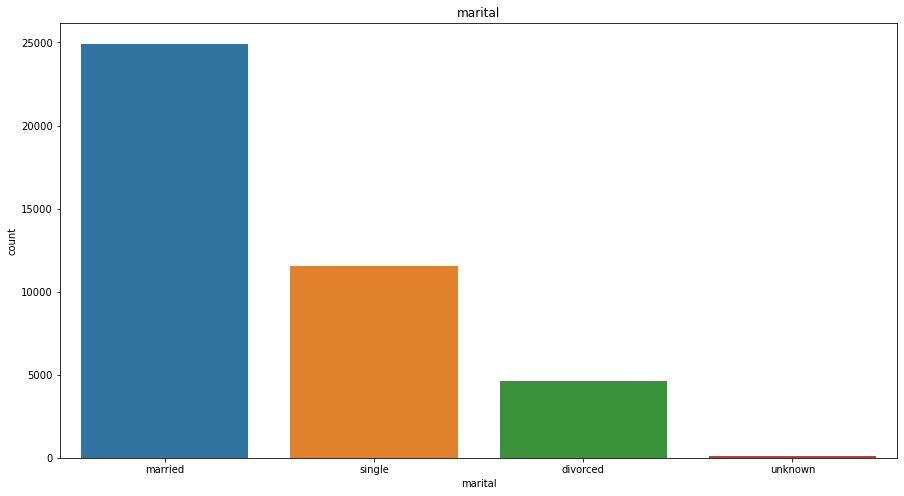

Value Counts of the  education column is
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 



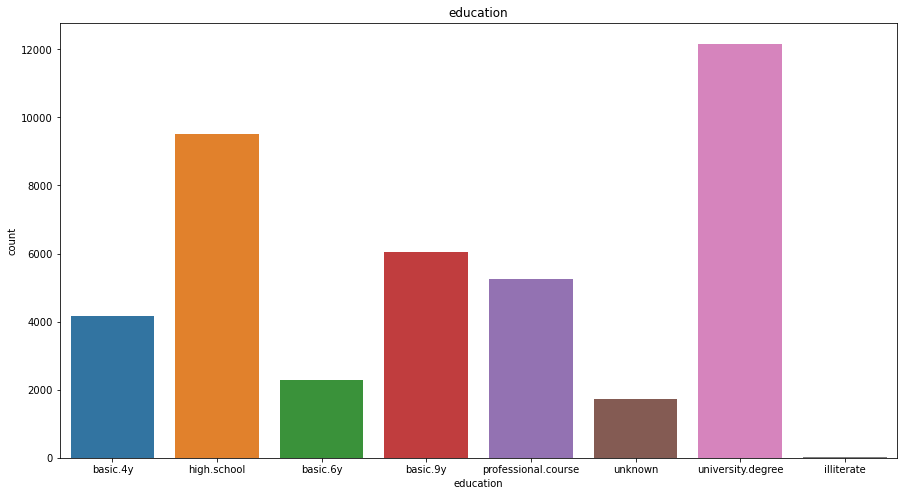

Value Counts of the  default column is
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64 



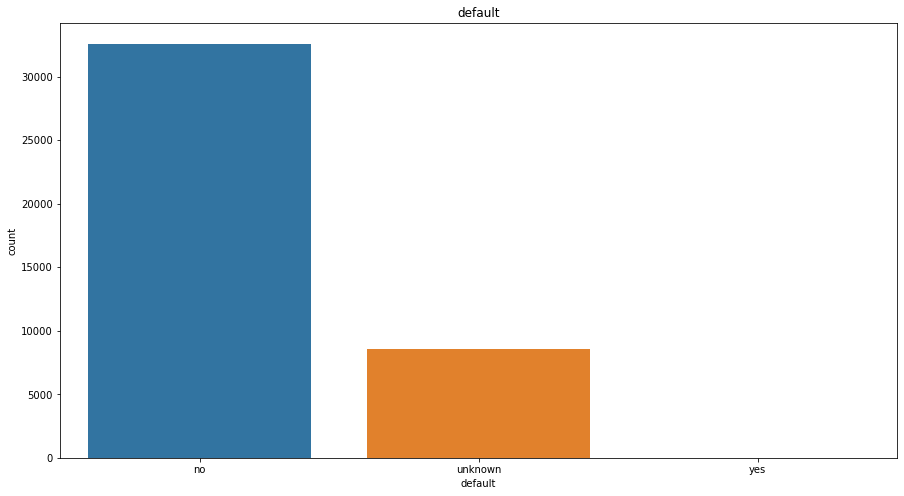

Value Counts of the  housing column is
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 



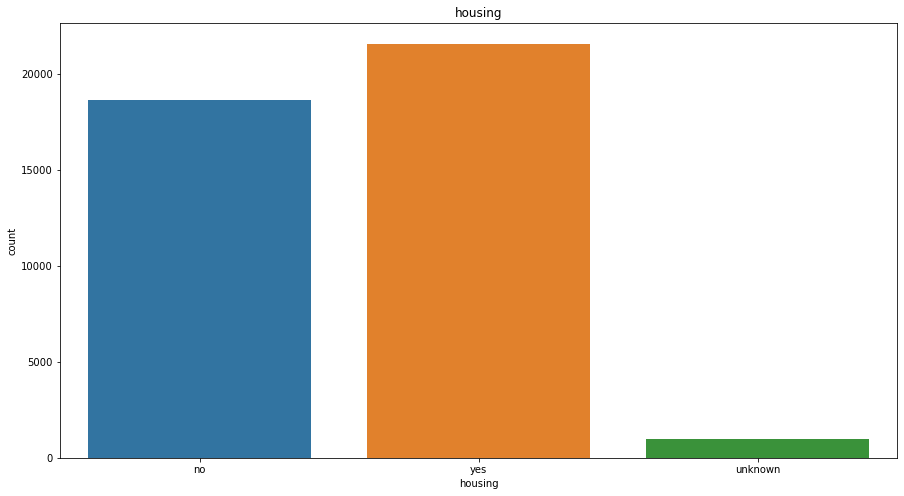

Value Counts of the  loan column is
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 



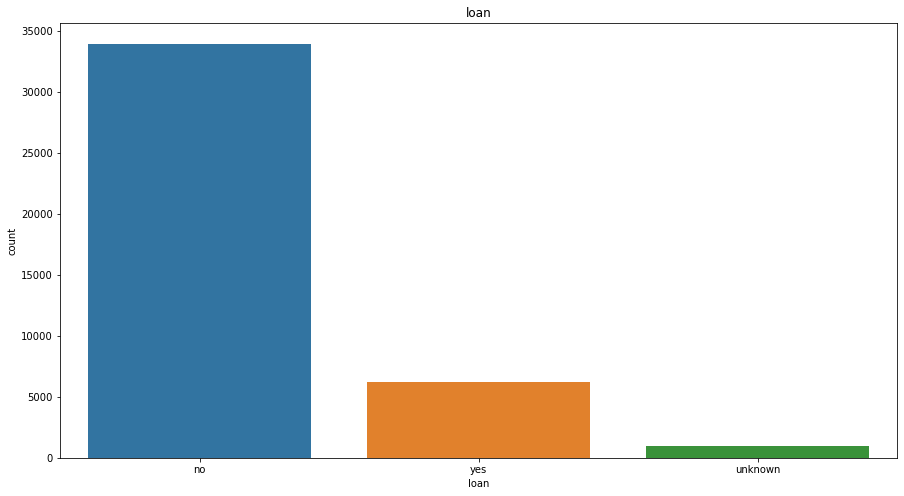

Value Counts of the  contact column is
 cellular     26144
telephone    15044
Name: contact, dtype: int64 



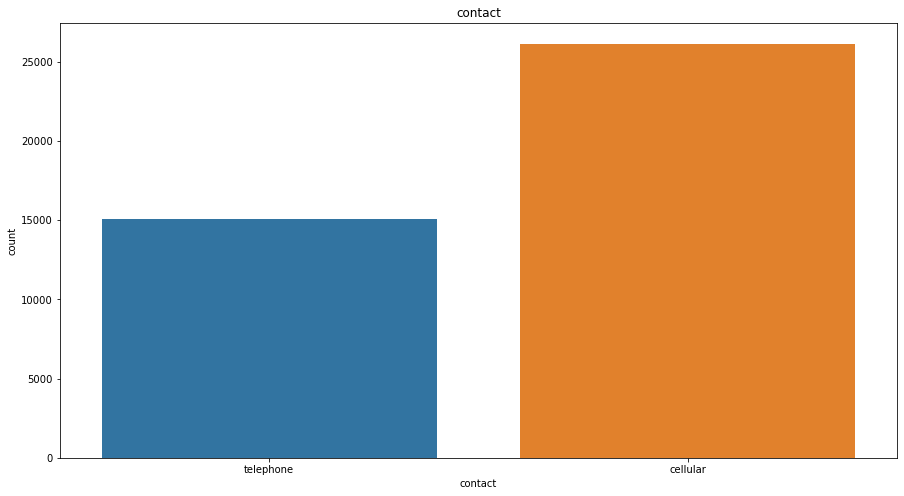

Value Counts of the  month column is
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64 



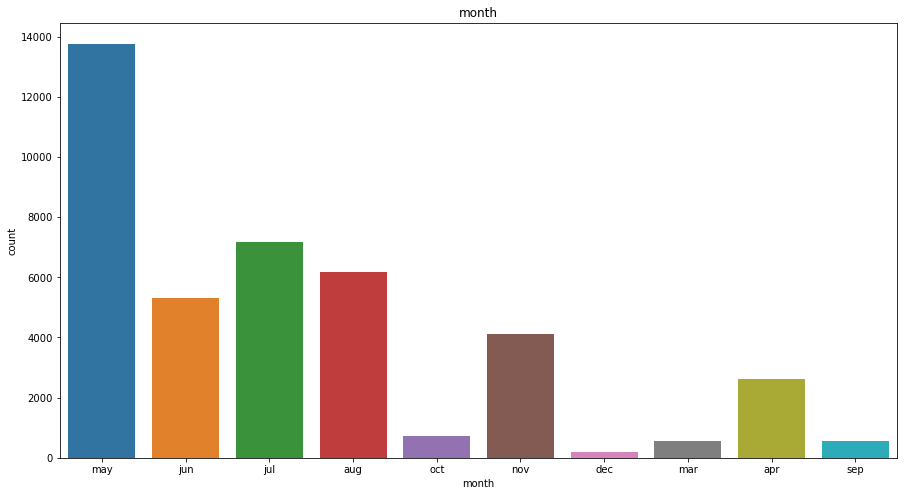

Value Counts of the  day_of_week column is
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64 



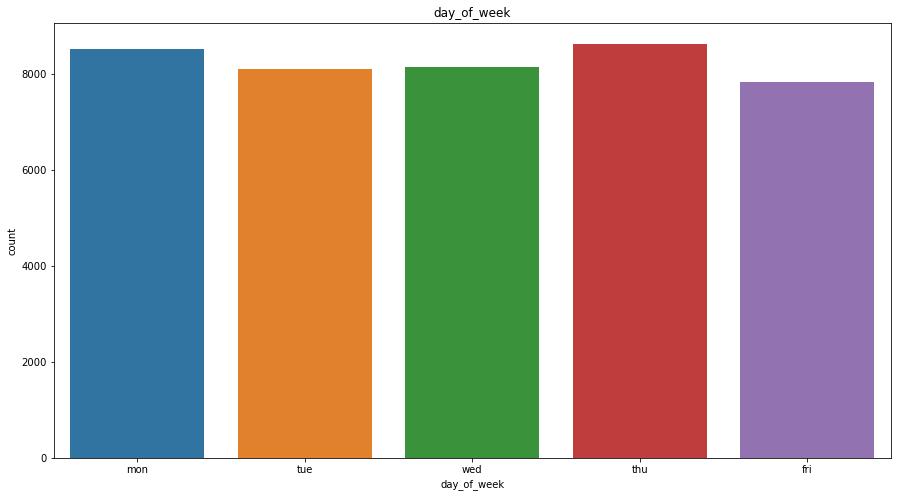

Value Counts of the  poutcome column is
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64 



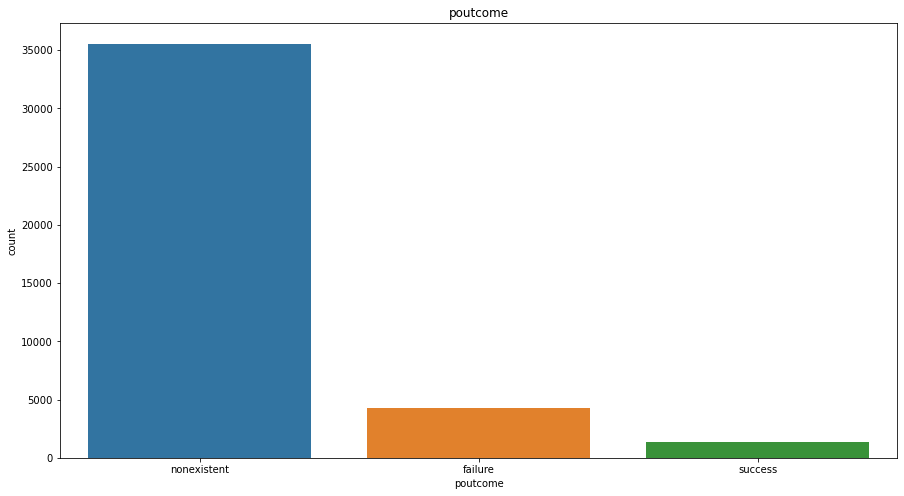

Value Counts of the  y column is
 no     36548
yes     4640
Name: y, dtype: int64 



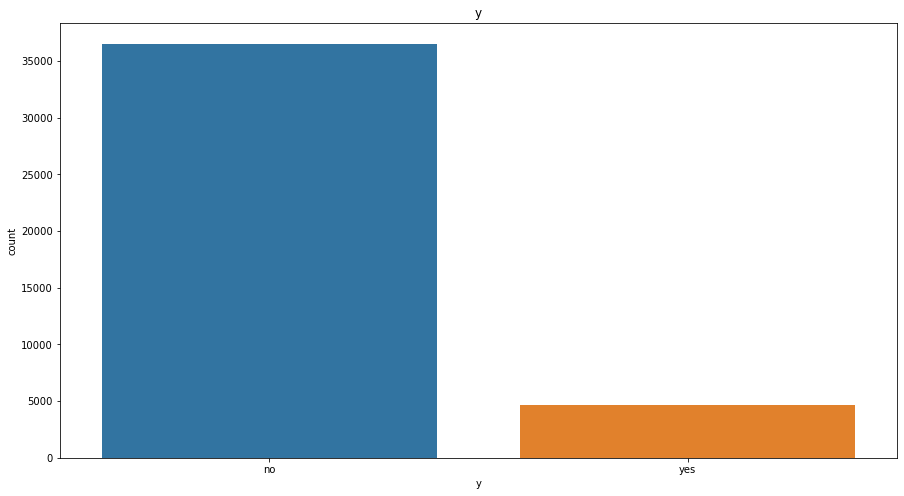

In [9]:
for i in categorical_features:
    print('Value Counts of the ',i,'column is\n',data[i].value_counts(),'\n')
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

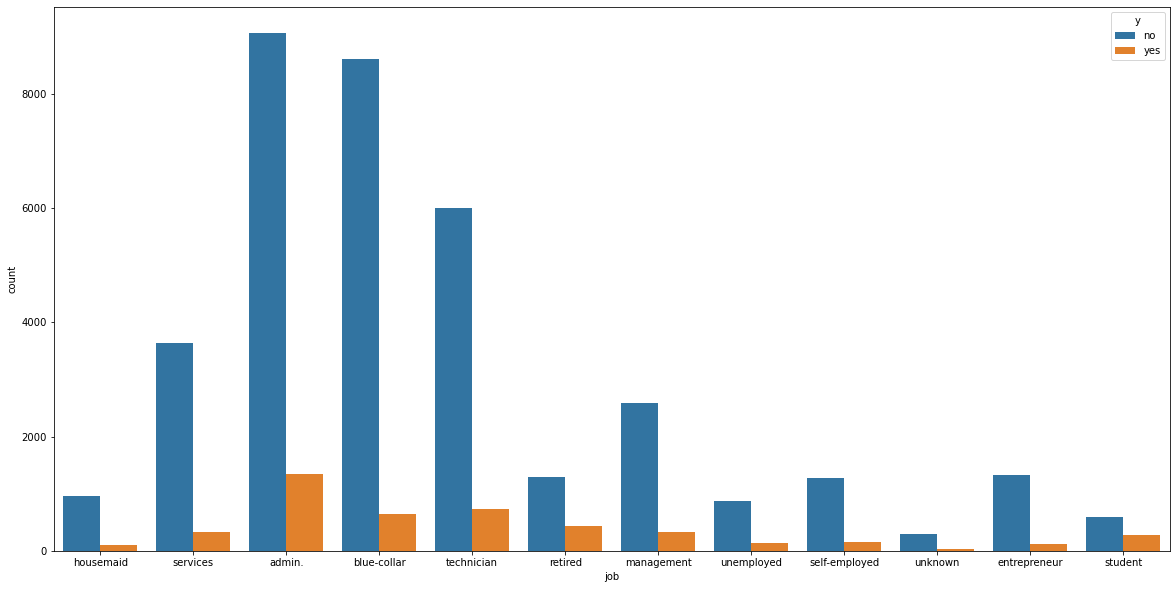

In [10]:
fig=plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='y',data=data)

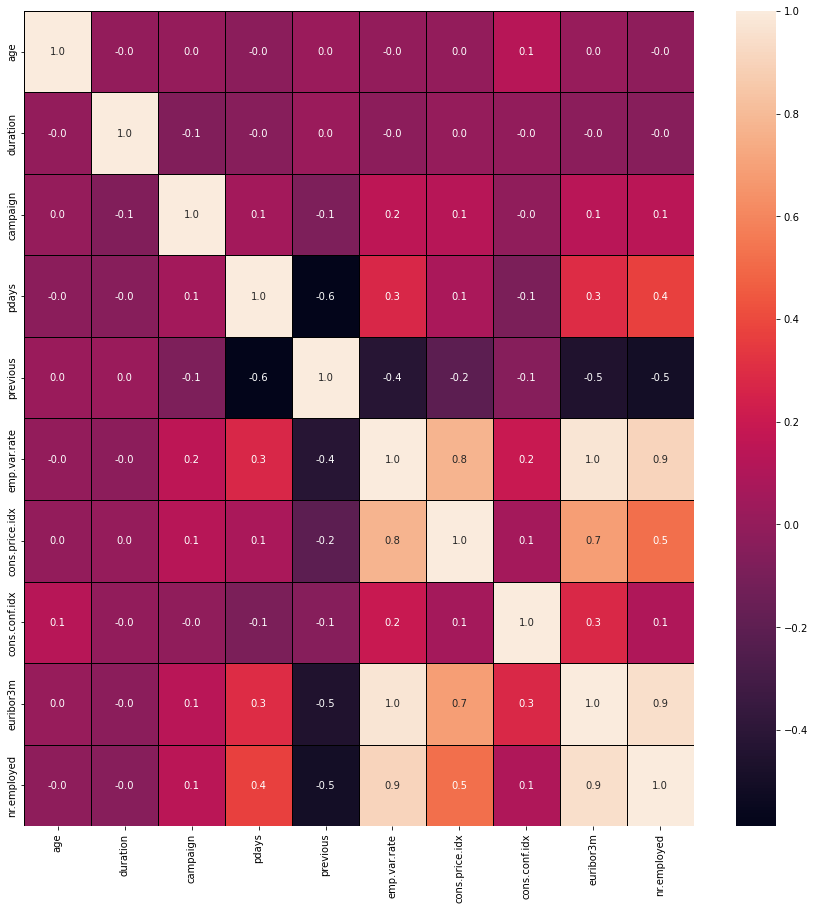

In [11]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

# From The Analysis of Categorical Colums it is revealed that :
1.Job: Highest Number of application are from admin type of job.
2.Marital: maximum number of client who approached were married.
3.Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well.
4.Default: Default variable has no impact on the client subscribing for term deposit. So we will drop this feature.
5.Housing: Housing loan does not have much effect on the number of term deposit purchased.
6.Loan: We approach around 84% of client with not having personal loan.
7.Contact: Around 64% calls are from cellular.
8.Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August.
9.day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
10.poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

### 2. Perform the following Exploratory Data Analysis tasks:

#### Treating the Column "pdays" by Binning

In [12]:
data.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [13]:
data['pdays']=data.pdays.replace(999,0)

In [14]:
data['pdays'].value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

In [15]:
data['pdays']=pd.cut(data.pdays,bins=[-1,1,5,28],
                      labels=['Low Calls','Moderate','High'])

In [16]:
data['pdays'].value_counts()

Low Calls    39714
High           810
Moderate       664
Name: pdays, dtype: int64

In [17]:
#  including 'basic.9y','basic.6y','basic.4y' as 'Primary'
# replacing all basics to primary 
data.education=data.education.str.replace(r'basic\.[0-9]y+','Primary',regex=True)
data.education.value_counts()

Primary                12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [18]:
# replacing blue collar with technician, housemaid with services , self_employed  with entrepreneur , student as unemplyed
data.job.replace({'blue-collar':'technician','housemaid':'services','self-employed':'entrepreneur','student':'unemployed'},inplace=True)
data.job.value_counts()

technician      15997
admin.          10422
services         5029
management       2924
entrepreneur     2877
unemployed       1889
retired          1720
unknown           330
Name: job, dtype: int64

# Dropping Duplicates

In [19]:
data = data.drop_duplicates(keep='first')

In [20]:
data.reset_index(inplace=True)

In [21]:
data.shape

(41173, 22)

## Label Encoding wherever required

In [22]:
data['education']=data['education'].replace(to_replace=['illiterate','unknown','Primary','high.school','university.degree','professional.course'],
                                                                value=[0,1,2,3,4,5])

In [23]:
data['education'].value_counts()

2    12509
4    12164
3     9512
5     5240
1     1730
0       18
Name: education, dtype: int64

In [24]:
data['month'].value_counts()

may    13764
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [25]:
# label encoding accounding to Months

data['month']=data['month'].replace(to_replace=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                                                value=[3,4,5,6,7,8,9,10,11,12])

In [26]:
data['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8133
tue    8085
fri    7825
Name: day_of_week, dtype: int64

In [27]:
data['day_of_week']=data['day_of_week'].replace(to_replace=['mon','tue','wed','thu','fri'],
                                                                value=[1,2,3,4,5])

In [28]:
data['day_of_week'].value_counts()

4    8618
1    8512
3    8133
2    8085
5    7825
Name: day_of_week, dtype: int64

In [29]:
data['poutcome'].value_counts()

nonexistent    35549
failure         4251
success         1373
Name: poutcome, dtype: int64

In [30]:
data['poutcome']=data['poutcome'].replace(to_replace=['nonexistent','failure','success'],value=[0,1,2])

In [31]:
data['poutcome'].value_counts()

0    35549
1     4251
2     1373
Name: poutcome, dtype: int64

In [32]:

# Label Encoding for target column as we do not want 2 column
#replace 'no' with 0
data['y']=data['y'].replace('no',0)

#replace 'yes'with 1
data['y']=data['y'].replace('yes',1)
data.head()

,index,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,services,married,2,no,no,no,telephone,5,1,261,1,Low Calls,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,1,57,services,married,3,unknown,no,no,telephone,5,1,149,1,Low Calls,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,2,37,services,married,3,no,yes,no,telephone,5,1,226,1,Low Calls,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,3,40,admin.,married,2,no,no,no,telephone,5,1,151,1,Low Calls,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,4,56,services,married,3,no,no,yes,telephone,5,1,307,1,Low Calls,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [33]:
data.y.value_counts()

0    36534
1     4639
Name: y, dtype: int64

#### Applying One hot encoder for the Remaining Categorical data

In [34]:
# one hot encoding
data_dummies=pd.get_dummies(data,drop_first=True)

In [35]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41173 entries, 0 to 41172
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              41173 non-null  int64  
 1   age                41173 non-null  int64  
 2   education          41173 non-null  int64  
 3   month              41173 non-null  int64  
 4   day_of_week        41173 non-null  int64  
 5   duration           41173 non-null  int64  
 6   campaign           41173 non-null  int64  
 7   previous           41173 non-null  int64  
 8   poutcome           41173 non-null  int64  
 9   emp.var.rate       41173 non-null  float64
 10  cons.price.idx     41173 non-null  float64
 11  cons.conf.idx      41173 non-null  float64
 12  euribor3m          41173 non-null  float64
 13  nr.employed        41173 non-null  float64
 14  y                  41173 non-null  int64  
 15  job_entrepreneur   41173 non-null  uint8  
 16  job_management     411

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [37]:
x=data_dummies.drop('y',axis=1)
y=data_dummies['y']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

RFC=RandomForestClassifier(n_estimators=50,n_jobs=-1,oob_score=True,random_state=1)

RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=1)

#### c. Selecting important features based on Random Forest

In [38]:
dfImpFeatures=pd.DataFrame(columns=['colname','count'])
dfImpFeatures['colname']=x.columns
dfImpFeatures['count']=RFC.feature_importances_
dfImpFeatures.sort_values(by='count',ascending=False)

,colname,count
5,duration,2.956265e-01
0,index,1.318981e-01
12,euribor3m,9.248444e-02
1,age,7.769670e-02
13,nr.employed,5.107522e-02
6,campaign,3.720799e-02
2,education,3.373477e-02
4,day_of_week,3.306782e-02
8,poutcome,2.942598e-02
11,cons.conf.idx,2.428647e-02


In [39]:
# to select the best features we take a Treshold of 0.03
Imp=dfImpFeatures[dfImpFeatures['count']>0.03]

In [40]:
# to select the best features we take a Treshold of 0.03
Impcolumns=Imp['colname'].values
Impcolumns

array(['index', 'age', 'education', 'day_of_week', 'duration', 'campaign',
       'euribor3m', 'nr.employed'], dtype=object)

In [41]:
data_dummies.y.value_counts()

0    36534
1     4639
Name: y, dtype: int64

#### d. Handling unbalanced data using SMOTE


In [42]:
from imblearn.over_sampling import SMOTE

x=data_dummies[Impcolumns]
y=data_dummies['y']

smote=SMOTE()

x_resamp,y_resamp=smote.fit_resample(x,y.ravel())

x_train,x_test,y_train,y_test=train_test_split(x_resamp,y_resamp,test_size=0.25,random_state=100)

#### e. Standard Scaler

In [43]:
x=data_dummies[Impcolumns]
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

## Build the following Supervised Learning models:

### a. Logistic Regression

In [44]:
lr=LogisticRegression()

lr.fit(x_train_sc,y_train)

LogisticRegression()

In [45]:
train_pred=lr.predict(x_train_sc)

In [46]:
test_pred=lr.predict(x_test_sc)

In [47]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     27413
           1       0.84      0.85      0.85     27388

    accuracy                           0.85     54801
   macro avg       0.85      0.85      0.85     54801
weighted avg       0.85      0.85      0.85     54801

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      9121
           1       0.85      0.86      0.85      9146

    accuracy                           0.85     18267
   macro avg       0.85      0.85      0.85     18267
weighted avg       0.85      0.85      0.85     18267



In [48]:
log_full_accuracy = accuracy_score(y_test,test_pred)
log_full_accuracy 

0.8508238900749986

from above we can tell the model is good as we are getting a accuracy of 85% with good recall and precision

### b. AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [50]:
ada.fit(x_train_sc,y_train)

train_pred=ada.predict(x_train_sc)

test_pred=ada.predict(x_test_sc)

In [51]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     27413
           1       0.87      0.89      0.88     27388

    accuracy                           0.88     54801
   macro avg       0.88      0.88      0.88     54801
weighted avg       0.88      0.88      0.88     54801

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      9121
           1       0.87      0.90      0.88      9146

    accuracy                           0.88     18267
   macro avg       0.88      0.88      0.88     18267
weighted avg       0.88      0.88      0.88     18267



In [52]:
adaboost_full_accuracy = accuracy_score(y_test, test_pred)
adaboost_full_accuracy

0.8827393660699622

conclusion: we get a better model model compare to Logistic Regression ,which means the model has improved

### c. Naïve Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()

In [54]:
nbc.fit(x_train_sc,y_train)

train_pred=nbc.predict(x_train_sc)

test_pred=nbc.predict(x_test_sc)

In [55]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78     27413
           1       0.76      0.85      0.80     27388

    accuracy                           0.79     54801
   macro avg       0.80      0.79      0.79     54801
weighted avg       0.80      0.79      0.79     54801

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      9121
           1       0.75      0.85      0.80      9146

    accuracy                           0.79     18267
   macro avg       0.79      0.79      0.78     18267
weighted avg       0.79      0.79      0.78     18267



In [56]:
naivebayes_imp_accuracy = accuracy_score(y_test,test_pred)
naivebayes_imp_accuracy

0.7854601193408879

conclusion: By using Naive bayes our model is not improving

### d. KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
accuracy={}
error1=[]
error2=[]
for k in range(1,15,1):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    
    #Fitting
    knn.fit(x_train_sc,y_train)
    
    #Predicting
    train_pred=knn.predict(x_train_sc)
    test_pred=knn.predict(x_test_sc)
    
    #errors
    error1.append(np.mean(y_train!= train_pred))
    error2.append(np.mean(y_test!= test_pred))
    
    tr_acc=accuracy_score(y_train,train_pred)
    
    ts_acc=accuracy_score(y_test,test_pred)
    
    accuracy[k]=[tr_acc,ts_acc]
accuracy

{1: [1.0, 0.8943997372310725],
 2: [0.9589788507508987, 0.874363606503531],
 3: [0.9380485757559168, 0.8951114030765862],
 4: [0.9307859345632379, 0.8883779493074944],
 5: [0.920402912355614, 0.8934690972792467],
 6: [0.9164978741263845, 0.8919910220616412],
 7: [0.91200890494699, 0.8934143537526688],
 8: [0.9106950603091184, 0.8913340997427054],
 9: [0.9063520738672652, 0.8913888432692834],
 10: [0.9051294684403569, 0.8902392292111457],
 11: [0.9027025054287331, 0.8896917939453659],
 12: [0.9013521651064762, 0.8887611539935403],
 13: [0.8991806718855495, 0.8890348716264301],
 14: [0.898833962883889, 0.8889253845732742]}

at k = 8 ,we can get a good model

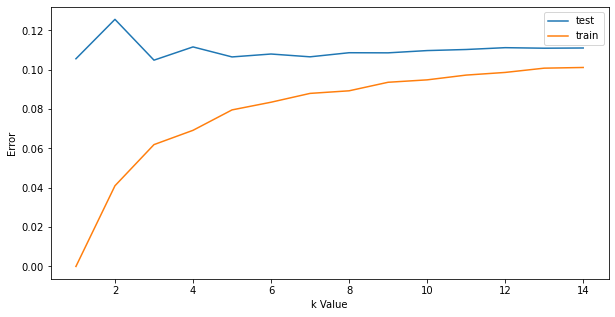

In [59]:
# Visualising the different K neighbour models
plt.figure(figsize=(10,5))
plt.plot(range(1,15,1),error2,label="test")
plt.plot(range(1,15,1),error1,label="train")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [60]:
knn=KNeighborsClassifier(n_neighbors=8,weights='uniform')
    
knn.fit(x_train_sc,y_train)
    
train_pred=knn.predict(x_train_sc)
test_pred=knn.predict(x_test_sc)
    


In [61]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     27413
           1       0.89      0.94      0.91     27388

    accuracy                           0.91     54801
   macro avg       0.91      0.91      0.91     54801
weighted avg       0.91      0.91      0.91     54801

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      9121
           1       0.87      0.92      0.89      9146

    accuracy                           0.89     18267
   macro avg       0.89      0.89      0.89     18267
weighted avg       0.89      0.89      0.89     18267



In [62]:
knn_accuracy = accuracy_score(y_test,test_pred)
knn_accuracy

0.8913340997427054

conclusion: KNN is giving a good Model at K=8

### e. SVM

In [63]:
from sklearn.svm import SVC

# build the model
svclassifier = SVC(kernel = 'poly')

# fit the model
svclassifier.fit(x_train_sc, y_train)

SVC(kernel='poly')

In [64]:
# predict the values
train_pred = svclassifier.predict(x_train_sc)

test_pred =svclassifier.predict(x_test_sc)

In [65]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     27413
           1       0.84      0.90      0.87     27388

    accuracy                           0.86     54801
   macro avg       0.87      0.86      0.86     54801
weighted avg       0.87      0.86      0.86     54801

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      9121
           1       0.84      0.90      0.87      9146

    accuracy                           0.87     18267
   macro avg       0.87      0.87      0.87     18267
weighted avg       0.87      0.87      0.87     18267



In [66]:
svc_accuracy=accuracy_score(y_test,test_pred)
svc_accuracy

0.8652761810915859

### Q4. Tabulate the performance metrics

In [67]:
models_Accuracy_df=pd.DataFrame({'Classification Model':['LOGISTIC','ADABOOST',"NAIVE-BAYES",'KNN','SVM'],
                               'Accuracy':[ log_full_accuracy,  adaboost_full_accuracy, naivebayes_imp_accuracy, knn_accuracy, svc_accuracy]})
models_Accuracy_df

,Classification Model,Accuracy
0,LOGISTIC,0.850824
1,ADABOOST,0.882739
2,NAIVE-BAYES,0.785460
3,KNN,0.891334
4,SVM,0.865276


## Best Model in KNN equal to 88% 